In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os
import sys

src_dir = './../../src/'
sys.path[0] = src_dir

import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import seaborn as sns


from access_biology_data import properties, annotation
from access_science_shared import standardizer 

In [4]:
sys.path.append('./../src/')
from aging_tools import inout, export

from access_science_shared import standardizer, utils

In [5]:
from scipy.stats import spearmanr



In [6]:
from scipy.stats import mannwhitneyu

In [7]:
from scipy.stats import spearmanr
from natsort import natsorted

In [8]:
save_images = False

In [9]:
outfolder = '211113_vadim'

In [10]:
ref_genes = standardizer.reference_genes(10090, 'orp')

pr = properties.genbank_validated_rna(10090)[
    ['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']
].rename(columns={
    'Genbank_validated_RNA: full_SumACGT': 'length'
})

pr.loc[:, 'log_length'] = np.log10(pr['length'])
pr = pr[pr['gene_ncbi'].isin(ref_genes)]

/Users/tstoeger/opt/miniconda3/envs/aging/lib/python3.7/site-packages/fastparquet/dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


In [11]:
sys.path.append('./../../../prepare_gustav/src')

In [12]:
# from gustav import mapper

In [13]:
ref_genes = standardizer.reference_genes(10090, 'orp')


In [14]:
from gustav import mapper

# Myc loss

In [31]:
p = '/Users/tstoeger/Dropbox/aging_map_paper/datasets/general/resources/publications/hofmann_2015/NIHMS649288-supplement-11.xlsx'

In [32]:
df = pd.read_excel(p).dropna(subset=['ID']).rename(columns={'ID': 'gene_ncbi'})

In [33]:
df = df.drop(columns=['Symbol', 'Name']).set_index('gene_ncbi').stack()

In [34]:
df = df.to_frame('change').rename_axis(['gene_ncbi', 'condition']).reset_index()

In [36]:
df['age'] = df['condition'].str.extract('^.*/(.*)$')

In [38]:
df['tissue'] = df['condition'].str.extract('^(.*)/.*$')

In [40]:
df['up'] = df['change']>0

In [42]:
d = pd.merge(df, pr)

In [43]:
d

,gene_ncbi,condition,change,age,tissue,up,length,log_length
0,76509.0,Adipose/Young,2.04,Young,Adipose,True,1846.0,3.266232
1,76509.0,Adipose/Old,5.24,Old,Adipose,True,1846.0,3.266232
2,67082.0,Adipose/Young,2.13,Young,Adipose,True,1167.0,3.067071
3,69380.0,Adipose/Old,-1.85,Old,Adipose,False,1036.0,3.015360
4,329375.0,Adipose/Old,1.72,Old,Adipose,True,931.0,2.968950
...,...,...,...,...,...,...,...,...
609,192201.0,Adipose/Old,-5.71,Old,Adipose,False,569.0,2.755112
610,22403.0,Adipose/Young,-1.82,Young,Adipose,False,1784.0,3.251395
611,58203.0,Adipose/Young,-1.59,Young,Adipose,False,1384.5,3.141293
612,170938.0,Adipose/Young,1.53,Young,Adipose,True,2963.0,3.471732


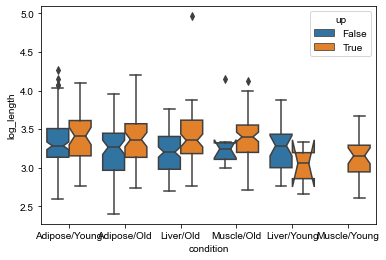

In [45]:
sns.boxplot(x='condition', hue='up', y='log_length', data=d, notch=True)

In [51]:
for condition in sorted(d['condition'].unique()):
    
    e = d[d['condition']==condition]

    pval = mannwhitneyu(
        e[e['up']==True]['length'],
        e[e['up']==False]['length'],
        alternative='two-sided'
    )
    
    print(condition, pval)

Adipose/Old MannwhitneyuResult(statistic=2180.0, pvalue=0.05338283565376788)
Adipose/Young MannwhitneyuResult(statistic=3174.0, pvalue=0.1553382841537677)
Liver/Old MannwhitneyuResult(statistic=4447.0, pvalue=0.0009373349135653636)
Liver/Young MannwhitneyuResult(statistic=21.0, pvalue=0.18902390052751938)
Muscle/Old MannwhitneyuResult(statistic=413.0, pvalue=0.23089395749460095)
Muscle/Young MannwhitneyuResult(statistic=0.0, pvalue=0.0)


# Snell dwarf???

Hoffmann et al. 2020 shows reports on interaction with genotype (which is significant for mild length-association). However, their supplemental table does not tell which phenotype (directionality) and labels of supplemental tables and main text appear discordant

In [14]:
p = '/Users/tstoeger/Dropbox/aging_map_paper/datasets/general/resources/publications/hoffmann_2020/aging-12-102822-s009..xlsx'



In [15]:
df = pd.read_excel(p, skiprows=1).rename(columns={'Transcript': 'symbol', 'Genotype Estimate': 'fold_change'})

In [16]:
df = df.groupby('symbol')['fold_change'].median().reset_index()

In [17]:
df = mapper.symbol_2_gene_ncbi(df, 10090)

In [18]:
d = pd.merge(df, pr)



In [19]:
print(spearmanr(d['log_length'], d['fold_change']))



SpearmanrResult(correlation=0.03638791845663473, pvalue=0.00030540928333971565)


In [20]:
d['increased'] = d['fold_change'] > 0

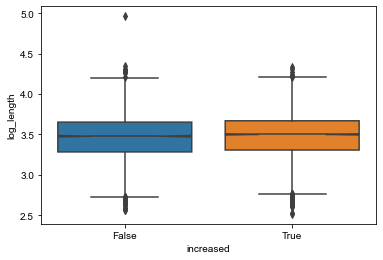

In [21]:
sns.boxplot(x='increased', y='log_length', data=d, notch=True)

In [22]:
d

,gene_ncbi,fold_change,length,log_length,increased
0,11287,-0.402984,4681.0,3.670339,False
1,11302,-0.029918,5423.0,3.734240,False
2,11303,0.125929,10260.0,4.011147,True
3,11304,0.146573,7268.0,3.861415,True
4,11305,0.135587,8061.0,3.906389,True
...,...,...,...,...,...
9837,102639598,-0.246568,3886.0,3.589503,False
9838,102902673,0.997329,2631.5,3.420203,True
9839,103611158,53.046428,4626.0,3.665206,True
9840,105180375,-0.084279,1251.0,3.097257,False


# Every other day

In [23]:
p = '/Users/tstoeger/Dropbox/aging_map_paper/datasets/general/resources/publications/ng_2019/13._Ng_et_al.,_2019-Table_S8_Top_50_Common_Genes_Liver_List.xlsx'



In [24]:
df = pd.read_excel(p).rename(columns={'#Gene name': 'symbol', 'EOD log2FoldChange': 'fold_change'})

In [25]:
df = mapper.symbol_2_gene_ncbi(
    df[['symbol', 'fold_change']].groupby('symbol').median(),
    10090
).reset_index()

In [26]:
d = pd.merge(df, pr)



In [27]:
d['increased'] = d['fold_change'] > 0

In [28]:
print(spearmanr(d['log_length'], d['fold_change']))



SpearmanrResult(correlation=0.06818751590615703, pvalue=0.706141491514793)


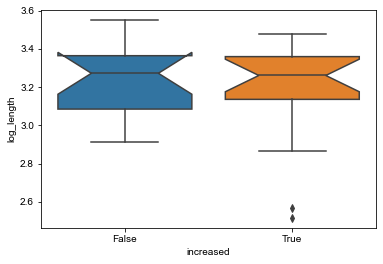

In [29]:
sns.boxplot(x='increased', y='log_length', data=d, notch=True)

In [30]:
d.shape

(33, 5)

# Little and dwarf mice

## Ames dwarf

SpearmanrResult(correlation=-0.016347491058331116, pvalue=0.7419954131616529)


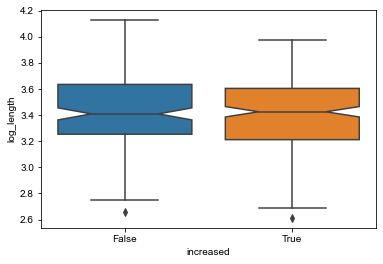

In [31]:
p = '/Users/tstoeger/Dropbox/aging_map_paper/datasets/general/resources/publications/amador_noguez_2004/acel_125_sm_tables1.xlsx'

df = pd.read_excel(p, skiprows=7)

d = mapper.symbol_2_gene_ncbi(df.rename(columns={'Gene': 'symbol'}).set_index('symbol'), 10090).reset_index()

d = pd.merge(d.groupby(['gene_ncbi'])['Fold Change'].median().reset_index(), pr)


print(spearmanr(d['log_length'], d['Fold Change']))

d['increased'] = d['Fold Change'] > 1

sns.boxplot(x='increased', y='log_length', data=d, notch=True)

## Little

SpearmanrResult(correlation=0.030594326341161163, pvalue=0.5216478227127932)


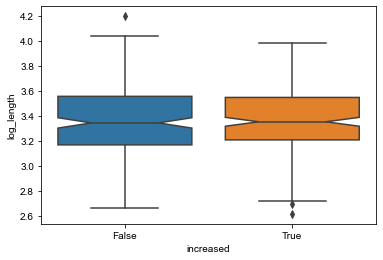

In [32]:
p = '/Users/tstoeger/Dropbox/aging_map_paper/datasets/general/resources/publications/amador_noguez_2004/acel_125_sm_tables2.xlsx'

df = pd.read_excel(p, skiprows=7)





d = mapper.symbol_2_gene_ncbi(df.rename(columns={'Common': 'symbol'}).set_index('symbol'), 10090).reset_index()
d = pd.merge(d.groupby(['gene_ncbi'])['Fold Change'].median().reset_index(), pr)



d = pd.merge(d, pr)

print(spearmanr(d['log_length'], d['Fold Change']))



d['increased'] = d['Fold Change'] > 1

sns.boxplot(x='increased', y='log_length', data=d, notch=True)

In [33]:
d.shape

(441, 5)

# S6k

In [34]:
p = '/Users/tstoeger/Dropbox/aging_map_paper/datasets/general/resources/publications/selman_2009/extracted_supplemental_tables.xlsx'

In [35]:
agg = []
for sheet in ['s2a', 's2b', 's3a', 's3b', 's4a', 's4b']:

    df = pd.read_excel(p, sheet_name=sheet)
    df.loc[:, 'sheet'] = sheet
    agg.append(df)

In [36]:
df = pd.concat(agg)
df['perturbation'] = df['sheet'].apply(lambda x: x[:2])

In [37]:
f = df['sheet'].apply(lambda x: x[-1]) == 'b'

In [38]:
df.loc[f, 'fc'] = -df.loc[f, 'fc']

In [39]:
d = df.groupby(['symbol', 'perturbation'])['fc'].median().reset_index()

In [40]:

d = mapper.symbol_2_gene_ncbi(d.set_index('symbol'), 10090).reset_index()

d = pd.merge(d, pr)



In [41]:
d['up'] = d['fc']>0

In [42]:
d

,gene_ncbi,perturbation,fc,length,log_length,up
0,11308,s3,0.57,3487.0,3.542452,True
1,11409,s4,-0.91,1881.0,3.274389,False
2,11428,s4,-1.17,4319.0,3.635383,False
3,11429,s2,0.80,2785.0,3.444825,True
4,11430,s2,1.15,3992.0,3.601191,True
...,...,...,...,...,...,...
2434,100040972,s4,1.27,971.0,2.987219,True
2435,100043133,s2,-1.02,3581.0,3.554004,False
2436,100043133,s3,-0.78,3581.0,3.554004,False
2437,100503043,s3,-1.19,9014.0,3.954918,False


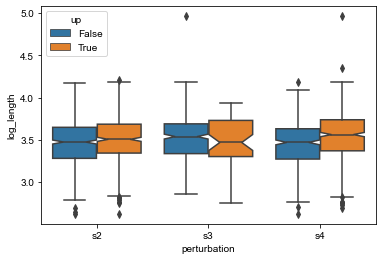

In [43]:
sns.boxplot(
    x='perturbation',
    y='log_length',
    hue='up',
    data=d,
    notch=True,
    order=['s2', 's3', 's4']
)

In [44]:
spearmanr(
    d[d['perturbation']=='s2']['length'],
    d[d['perturbation']=='s2']['fc'])



SpearmanrResult(correlation=0.07011803945888155, pvalue=0.020201170540333054)

In [45]:
spearmanr(
    d[d['perturbation']=='s3']['length'],
    d[d['perturbation']=='s3']['fc'])




SpearmanrResult(correlation=-0.05629081454073649, pvalue=0.24687814090826396)

In [46]:
spearmanr(
    d[d['perturbation']=='s4']['length'],
    d[d['perturbation']=='s4']['fc'])



SpearmanrResult(correlation=0.07970820743112893, pvalue=0.015766581508464907)

In [47]:
# S2: liver of S6K-/- mice compared to wild type mice.
# S3: muscle of S6K-/- mice compared to wild type mice.
# S4: adipose tissue of S6K-/- mice compared to wild type mice.

# HUMAN

# FGF21 increase

In [48]:
p = '/Users/tstoeger/Dropbox/aging_map_paper/datasets/general/resources/publications/murray_2020/Supp Tables Full resubmit.xlsx'

In [15]:
ref_genes = standardizer.reference_genes(9606, 'orp')

pr = properties.genbank_validated_rna(9606)[
    ['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']
].rename(columns={
    'Genbank_validated_RNA: full_SumACGT': 'length'
})

pr.loc[:, 'log_length'] = np.log10(pr['length'])
pr = pr[pr['gene_ncbi'].isin(ref_genes)]

In [50]:
df = pd.read_excel(p, 'S1a AT DEG')     # adipose tissue

df = mapper.gene_ensembl_2_gene_ncbi(
    df[['GeneID', 'Post.vs.Pre_logFC']].rename(columns={
        'GeneID': 'gene_ensembl',
        'Post.vs.Pre_logFC': 'fold_change'
    }),
    9606
).reset_index()

d = pd.merge(df, pr)

In [51]:
spearmanr(d['length'], d['fold_change'])

SpearmanrResult(correlation=0.029693847693926655, pvalue=0.0008349780222861705)

In [52]:
d['up'] = d['fold_change'] > 0

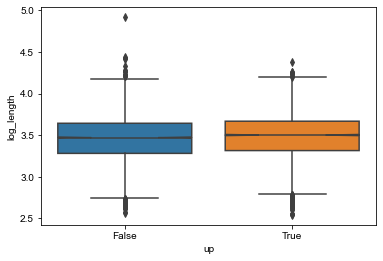

In [53]:
sns.boxplot(
    x='up',
    y='log_length',
    data=d,
    notch=True
)

In [54]:
df = pd.read_excel(p, 'S1b SM DEG')    # Skeletal muscle

df = mapper.gene_ensembl_2_gene_ncbi(
    df[['GeneID', 'Post.vs.Pre_logFC']].rename(columns={
        'GeneID': 'gene_ensembl',
        'Post.vs.Pre_logFC': 'fold_change'
    }),
    9606
).reset_index()

d = pd.merge(df, pr)

In [55]:
spearmanr(d['length'], d['fold_change'])

SpearmanrResult(correlation=0.14935151342905562, pvalue=4.4671726200618665e-59)

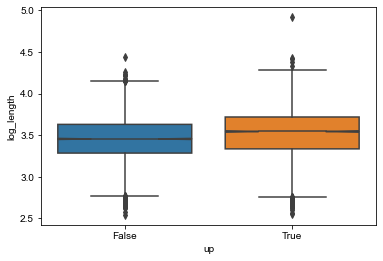

In [56]:
d['up'] = d['fold_change'] > 0

sns.boxplot(
    x='up',
    y='log_length',
    data=d,
    notch=True
)

# Metformin


In [57]:
p = '/Users/tstoeger/Dropbox/aging_map_paper/datasets/general/resources/publications/luizon_2015/pgen.1006449.s008.xlsx'

In [58]:
df = pd.read_excel(p, skiprows=1).rename(columns={'GeneID': 'gene_ensembl', 'log2FoldChange': 'fold_change'})

In [59]:
df = df.dropna(subset=['padj'])

In [60]:
df = mapper.gene_ensembl_2_gene_ncbi(
    df[['gene_ensembl', 'fold_change']], 
    9606)

In [61]:
d = pd.merge(df, pr)

In [62]:
spearmanr(d['length'], d['fold_change'])

SpearmanrResult(correlation=0.02580485079767922, pvalue=0.006519347011433803)

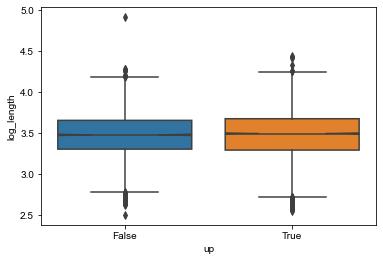

In [63]:
d['up'] = d['fold_change'] > 0

sns.boxplot(
    x='up',
    y='log_length',
    data=d,
    notch=True
)

# Resveratrol



In [64]:

p = '/Users/tstoeger/Dropbox/aging_map_paper/datasets/general/resources/publications/dembic_2019/ScienceDirect_files_16Nov2021_22-07-17.076/1-s2.0-S1096719218304955-mmc3.xlsx'



df = pd.read_excel(p).rename(columns={'Ensembl_ID': 'gene_ensembl', 'log2FoldChange': 'fold_change'})

df = df.dropna(subset=['padj'])





df =  mapper.gene_ensembl_2_gene_ncbi(df[['gene_ensembl', 'fold_change']], 9606)

d = pd.merge(df, pr)




In [65]:
spearmanr(d['length'], d['fold_change'])

SpearmanrResult(correlation=0.03530820334229846, pvalue=0.00013525827846478806)

# senolytics


In [19]:

p = '/Users/tstoeger/Dropbox/aging_map_paper/datasets/general/resources/publications/jochems_2021/mmc2.xlsx'

df = pd.read_excel(p).dropna(subset=['Padj'])

df = df[['Gene name', 'LogFC']].rename(columns={
    'Gene name': 'symbol',
    'LogFC': 'fold_change'
}).groupby('symbol').median().reset_index()



In [20]:
df['symbol'] = df['symbol'].astype(str)

In [21]:
from gustav import ncbi

In [24]:
df = mapper.symbol_2_gene_ncbi(df, 9606)

In [25]:
df

,gene_ncbi,fold_change
0,1,-0.222755
1,2,0.612446
2,9,0.610973
3,10,2.438792
4,12,0.793623
...,...,...
17695,114108587,0.606954
17696,114515521,0.852736
17697,115072896,-0.216661
17698,115804232,0.492588


In [26]:
d = pd.merge(df, pr)

In [27]:
spearmanr(d['length'], d['fold_change'])

SpearmanrResult(correlation=0.04698914058793894, pvalue=5.202100016573521e-09)

<AxesSubplot:xlabel='up', ylabel='log_length'>

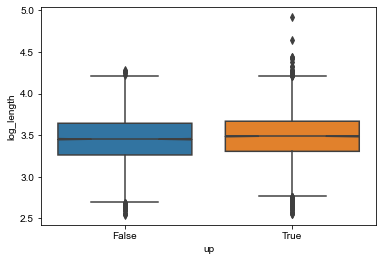

In [28]:
d['up'] = d['fold_change'] > 0

sns.boxplot(
    x='up',
    y='log_length',
    data=d,
    notch=True
)